In [187]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
#Cargar datos
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/tips.csv'
df_tips = pd.read_csv(filename, sep=',', encoding='utf8') 

#Explorar los datos
print(df_tips.columns)
print(df_tips.describe().round(3))

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
       total_bill      tip     size
count     244.000  244.000  244.000
mean       19.786    2.998    2.570
std         8.902    1.384    0.951
min         3.070    1.000    1.000
25%        13.348    2.000    2.000
50%        17.795    2.900    2.000
75%        24.127    3.562    3.000
max        50.810   10.000    6.000


## Una variable númerica

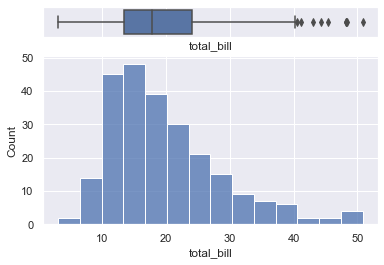

In [17]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_tips["total_bill"], ax=ax_box)
sns.histplot(data=df_tips, x="total_bill", ax=ax_hist)
plt.show()

## Una variable númerica y una variable categórica

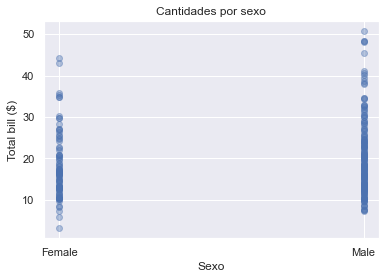

In [19]:
plt.scatter(df_tips.sex, df_tips.total_bill, alpha=0.4)
plt.title('Cantidades por sexo')
plt.ylabel('Total bill ($)')
plt.xlabel('Sexo')
plt.show()


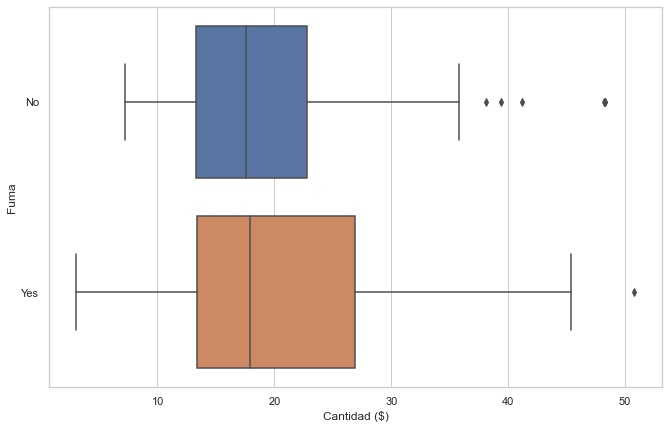

In [21]:
plt.figure(figsize =(11, 7))
sns.set_style("whitegrid")
sns.boxplot(x="total_bill", y="smoker", data=df_tips)
plt.ylabel('Fuma')
plt.xlabel('Cantidad ($)')
plt.show()

## Dos variables categóricas y una númerica

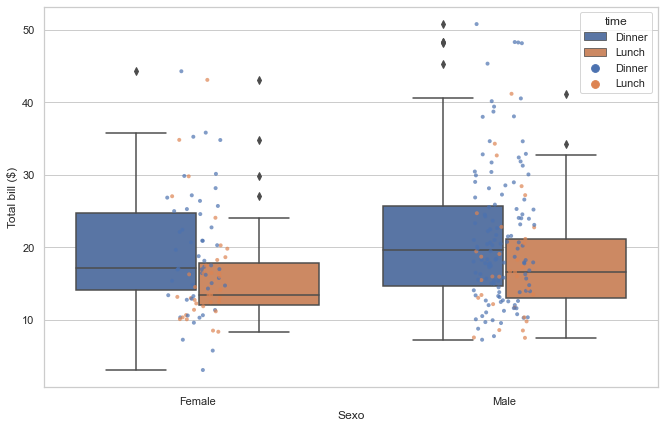

In [23]:
plt.figure(figsize =(11, 7))
sns.boxplot(x='sex', y='total_bill', hue = 'time', data=df_tips, orient='v')
sns.stripplot(x='sex', y='total_bill', hue='time', data=df_tips, orient='v', alpha= 0.7, size=4)
plt.xlabel('Sexo')
plt.ylabel('Total bill ($)')
plt.show()

## Tres variables categóricas y una númerica

<Figure size 1440x720 with 0 Axes>

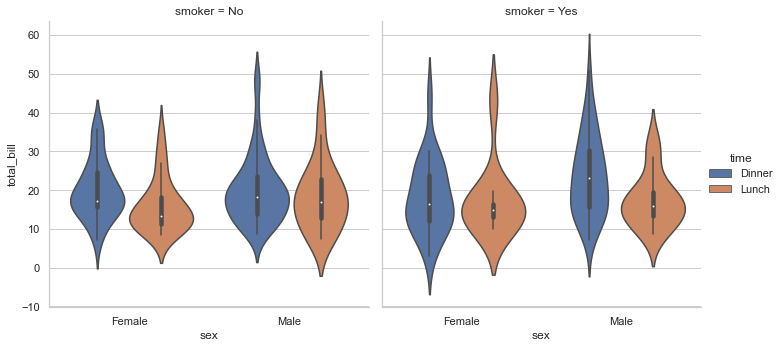

In [25]:
plt.figure(figsize =(20, 10))
g=sns.catplot(x='sex', y='total_bill', hue = 'time', col='smoker', data=df_tips, orient='v', kind='violin')
plt.show()

In [262]:
pd.options.display.max_columns = None
datasets_path = r"C:\Users\Lucía Alvarez\OneDrive - psico.edu.uy\00 Barcelona activa" + os.sep
file = "movies.dat"
movie_column_l = ['ID', 'TITULO', 'GENERO']
df_movies = pd.read_table(datasets_path + file, sep='::', header=None, names=movie_column_l, engine='python', encoding = "ISO-8859-1")

#Para separar la columna TITULO en dos:
Nueva_variable = df_movies["TITULO"].str.split('[()]', expand=True)
Nueva_variable[1]

df=df_movies.assign(TITULO=Nueva_variable[0], AÑO=Nueva_variable[1])

df["AÑO"] = df["AÑO"]._convert(numeric=True)
df.dtypes


ID          int64
TITULO     object
GENERO     object
AÑO       float64
dtype: object

In [263]:
dummy_df = df.GENERO.str.get_dummies(sep='|')
df = df.join(dummy_df)
df.tail(2)

,ID,TITULO,GENERO,AÑO,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3881,3951,Two Family House,Drama,2000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,3952,"Contender, The",Drama|Thriller,2000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Una variable númerica

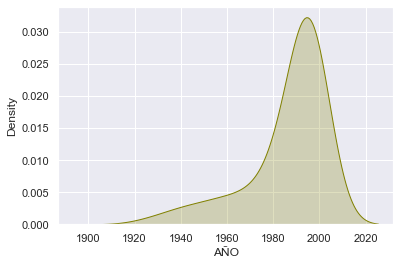

In [264]:
sns.set(style="darkgrid")

sns.kdeplot(df['AÑO'], shade=True, bw=0.5, color="olive")
plt.show()

## Una variable númerica y una variable categórica

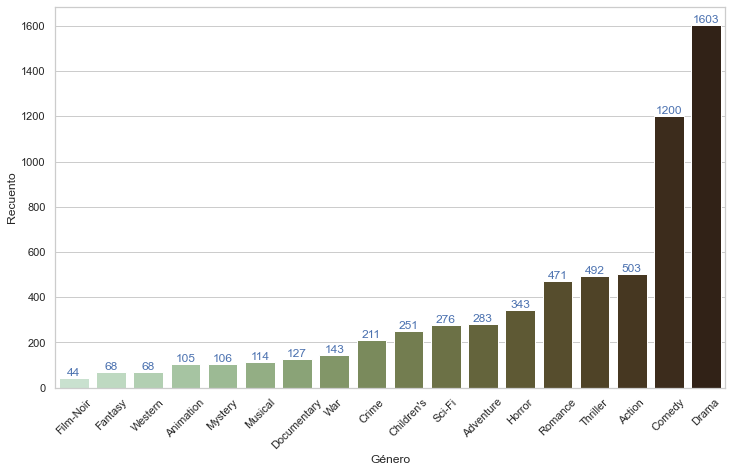

In [265]:
data = dummy_df.apply(np.sum).sort_values()

plt.figure(figsize =(12, 7))
sns.set_style("whitegrid")
sns.barplot(x=data.index, y=data.values, palette="ch:1")
for i in range(len(data)):
    plt.annotate(text=int(data.values[i]), xy=(i, data.values[i]), 
                 horizontalalignment='center', verticalalignment='bottom', color="b")
plt.xlabel("Género")
plt.ylabel("Recuento")
plt.xticks(rotation=45)
plt.show()

## Dos variables categóricas y una númerica

In [276]:
print('El valor minimo de la variable año es :', min(df.AÑO), "y el máximo es ", max(df.AÑO))
valores=(-math.inf, 1940, 1960, math.inf)
categorias= ("Hasta el año 1940", "Desde el 1940 al 1960", "Mayor a 1960")

df['AÑO2'] = pd.cut(x=df['AÑO'], bins=valores, labels=categorias)


df2 = df.groupby("AÑO2")[dummy_df.columns].sum()
df2


El valor minimo de la variable año es : 1919.0 y el máximo es  2000.0


,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
AÑO2,,,,,,,,,,,,,,,,,,
Hasta el año 1940,4,9,5,7,41,5,1,42,0,1,9,14,5,21,3,13,5,4
Desde el 1940 al 1960,10,18,13,23,44,16,1,95,4,25,36,30,16,26,32,35,24,11
Mayor a 1960,466,248,83,220,1059,180,119,1293,63,17,273,68,83,389,225,434,104,53


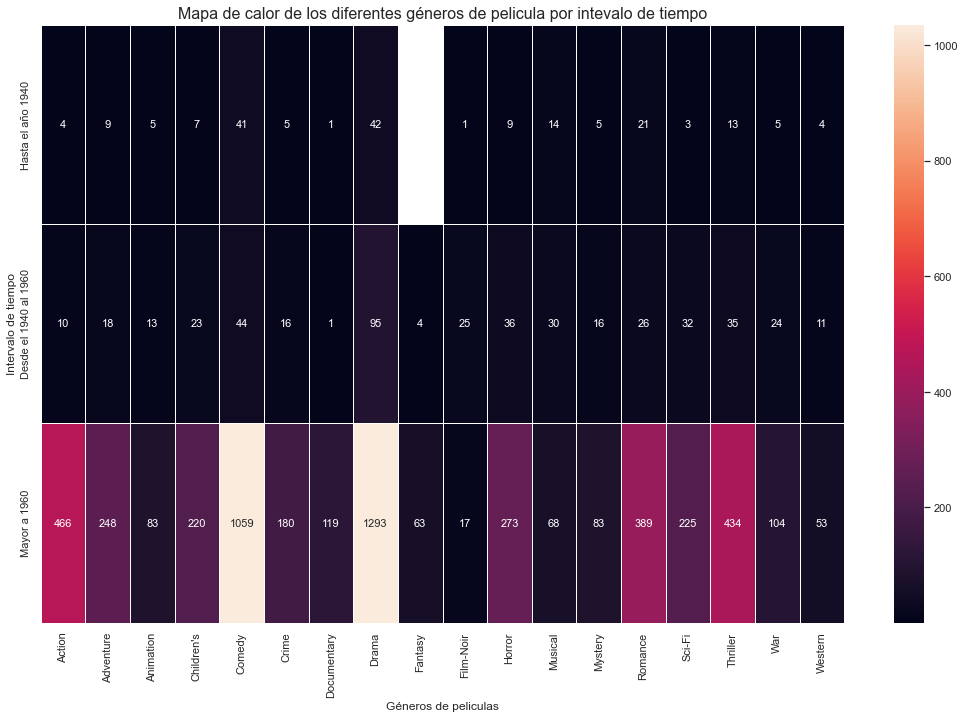

In [279]:
#dibuixem ara el mapa de calor. No mostrem les caselles amb valor 0
plt.figure(figsize =(18, 11))
mask = df2 == 0
sns.heatmap(df2, annot=True, annot_kws={"size": 11}, robust=True, fmt='.0f', mask=mask, linewidths=1, linecolor="w")
plt.title("Mapa de calor de los diferentes géneros de pelicula por intevalo de tiempo", fontdict={'fontsize':16})
plt.xlabel("Géneros de peliculas")
plt.ylabel("Intervalo de tiempo")
plt.show()